In [0]:
# update pytorch and fastai to latest versions
!pip install torch -U
!pip install torchvision -U
!pip install fastai -U 
!pip install kaggle

In [0]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
# mount your google drive so you can save to it
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [0]:
#os.mkdir('blindness_detection')

In [0]:
os.chdir('/content/gdrive/My Drive/projects/')

In [7]:
os.getcwd()

'/content/gdrive/My Drive/projects'

In [8]:
os.listdir()

['blindness_detection']

In [0]:
# create environment variables for kaggle to authenticate with
# os.environ['KAGGLE_USERNAME'] = "insert-here"
# os.environ['KAGGLE_KEY'] = "insert-here"

In [0]:
#!kaggle competitions download -c aptos2019-blindness-detection -p 'blindness_detection'

In [11]:
os.listdir('blindness_detection/')

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb']

In [0]:
#!unzip 'blindness_detection/train_images.zip' -d 'train_images'
#!unzip 'blindness_detection/test_images.zip' -d 'test_images'

In [0]:
os.chdir('blindness_detection/')

In [14]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'train.csv')
# make a dataframe from test.csv
test_df = pd.read_csv(path/'test.csv')

In [16]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [17]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [0]:
# create a dictionary for the varying levels of diabetic retinopathy
dr_dict = {0: 'No DR', # no diabetic retinopathy,
           1: 'Mild', # mild case of diabetic retinopathy,
           2: 'Moderate', # moderate level of diabetic retinopathy
           3: 'Severe', # severe case of diabetic retinopathy
           4: 'Proliferative DR' # worst case scenario
          }

In [0]:
# create target column that generates more descriptive labels vs. integer values
train_df['target'] = train_df['diagnosis'].map(dr_dict)

In [20]:
train_df.tail()

,id_code,diagnosis,target
3657,ffa47f6a7bf4,2,Moderate
3658,ffc04fed30e6,0,No DR
3659,ffcf7b45f213,2,Moderate
3660,ffd97f8cd5aa,0,No DR
3661,ffec9a18a3ce,2,Moderate


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
target       3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [0]:
# convert target column to categorical type
train_df['target'] = train_df['target'].astype('category')

In [0]:
# drop diagnosis column
train_df.drop(labels='diagnosis', axis=1, inplace=True)

In [24]:
train_df.head()

,id_code,target
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [25]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb']

In [26]:
train_images_path = path/'images_train'
train_images_path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection/images_train')

In [0]:
# import deep learning libraries
import torch
import fastai
from fastai import *
from fastai.vision import *

data = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=64,
                              bs=16)
       )

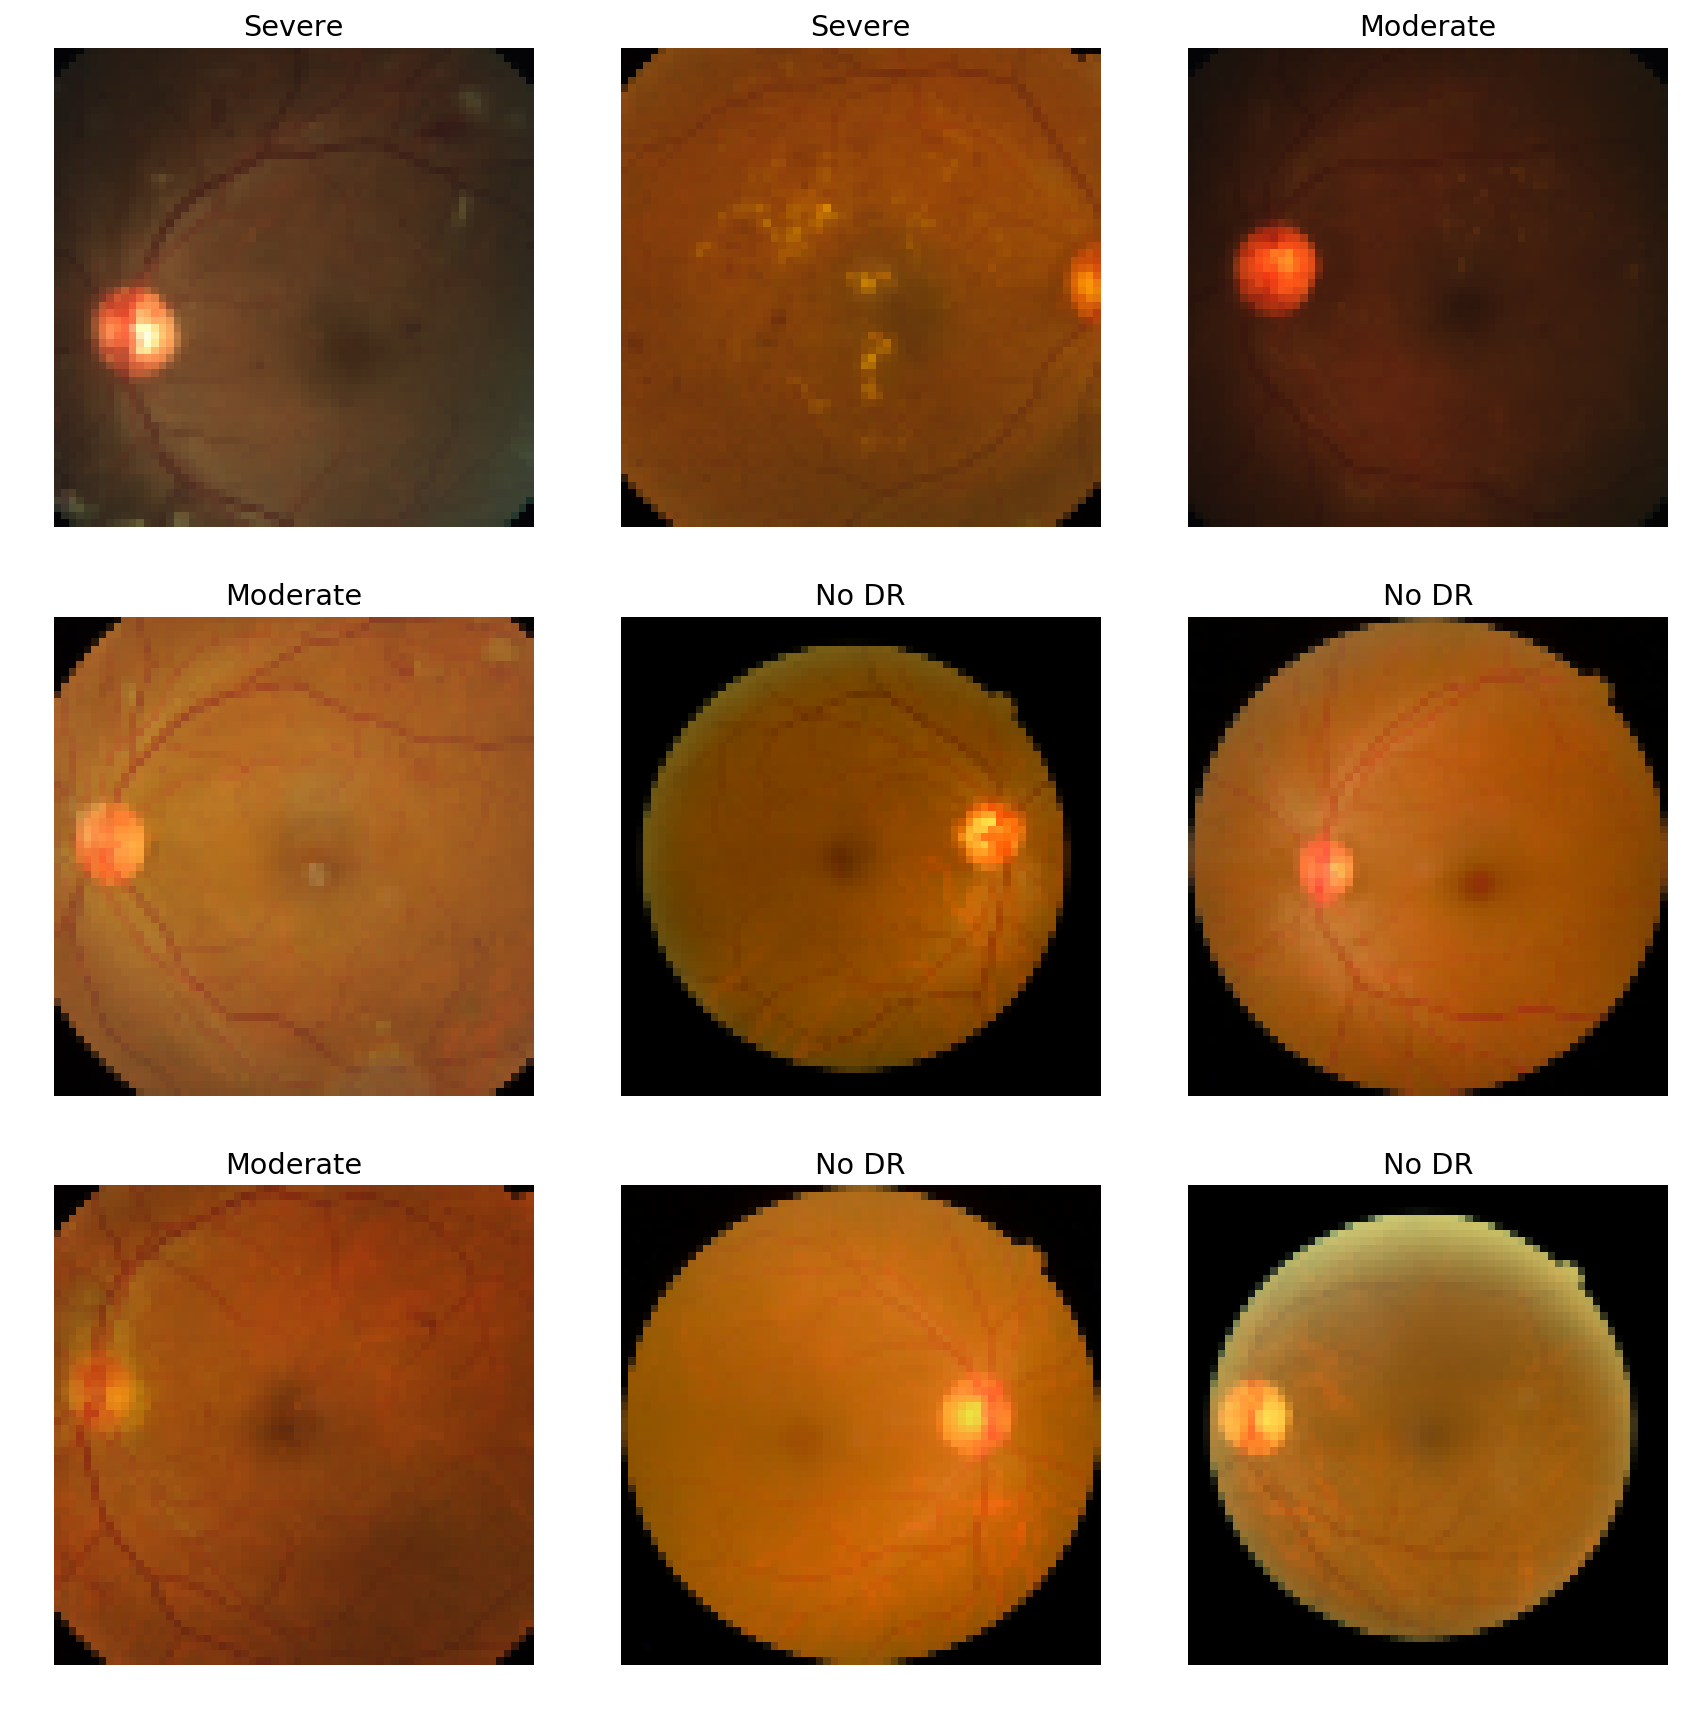

In [46]:
data.show_batch(rows=3)

In [47]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models',
 'trial1_aptos.ipynb']

In [48]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Mild,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [50]:
data

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Mild,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: LabelList (1928 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train

# Create Learner and Model Training

In [51]:
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# create Kappa Score metric
kappa = KappaScore()
kappa.weights = "quadratic"

In [0]:
learn = cnn_learner(data, models.resnet50,
                    metrics=[error_rate, kappa, Recall(), Precision()],
                    pretrained=True,
                    bn_final=True,
                    path=path/'models'
                   )

In [54]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [55]:
os.getcwd()

'/content/gdrive/My Drive/projects/blindness_detection'

In [0]:
# load weights from trial1 notebook
learn.load(path/'models/models/trial1-rd1');

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.09E-01
Min loss divided by 10: 6.31E-08


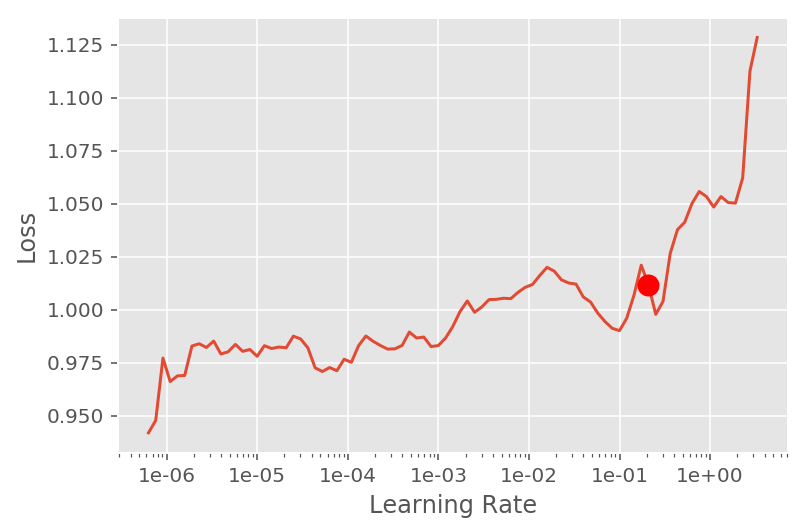

In [58]:
learn.recorder.plot(suggestion=True)

In [0]:
# set learning rate
lr = learn.recorder.min_grad_lr
lr

0.0002754228703338166

In [59]:
from fastai.callbacks import SaveModelCallback, EarlyStoppingCallback

learn.fit_one_cycle(5, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                    monitor='kappa', name='trial2-rd1')),
                                 EarlyStoppingCallback(learn, monitor='kappa', 
                                                       min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.949526,0.820695,0.267760,0.311645,0.517288,0.552822,12:58
1,0.812440,0.737069,0.251366,0.255281,0.490915,0.557293,07:25
2,0.704993,0.695328,0.241803,0.301071,0.488063,0.621879,07:29
3,0.622790,0.704417,0.252732,0.336900,0.496213,0.579572,07:23
4,0.617838,0.701861,0.248634,0.327037,0.497494,0.571863,07:28


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:189: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:50: UserWarning: <class 'fastai.callbacks.tracker.SaveModelCallback'> conditioned on metric `kappa` which is not available. Available metrics are: train_loss, valid_loss, error_rate, kappa_score, recall, precision
  warn(f'{self.__class__} conditioned on metric `{self.monitor}` which is not available. Available metrics are: {", ".join(map(str, self.learn.recorder.names[1:-1]))}')
/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:50: UserWarning: <class 'fastai.callbacks.tracker.EarlyStoppingCallback'> conditioned on metric `kappa` which is not available. Available metrics are: train_loss, valid_loss, error_r

In [0]:
learn.save('trial2-rd1');

# Increase Image Size to 128

In [0]:
data_128 = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=128,
                              bs=16))

In [62]:
data_128.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Mild,No DR,No DR,Moderate,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data_128.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
# feed data_128 into learner
learn.data = data_128

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial2-rd1');

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06
Min loss divided by 10: 2.75E-03


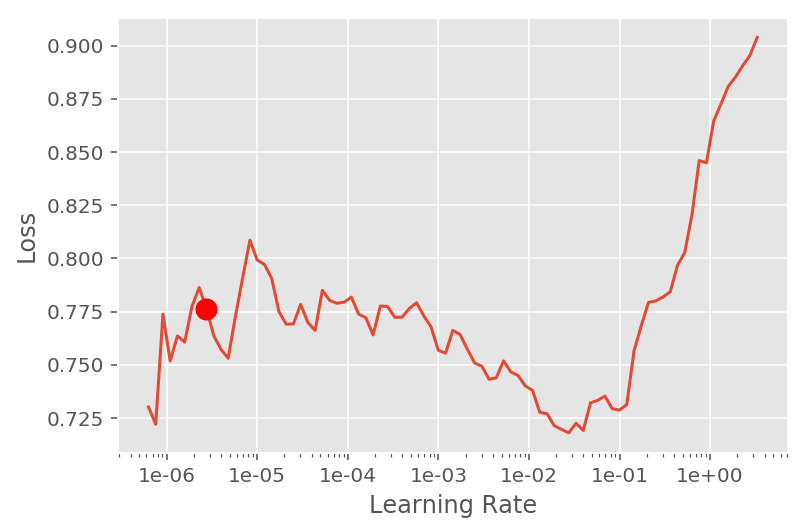

In [67]:
learn.recorder.plot(suggestion=True)

In [68]:
learn.fit_one_cycle(5, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                    monitor='kappa_score', name='trial2-rd2')),
                                 EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                       min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.710212,0.651345,0.240437,0.364916,0.517909,0.618562,07:39
1,0.628074,0.595354,0.225410,0.442955,0.561443,0.615407,07:36
2,0.560978,0.578110,0.207650,0.528075,0.606970,0.648652,07:42
3,0.460098,0.595097,0.218579,0.517664,0.604925,0.647086,07:40
4,0.404362,0.602596,0.203552,0.549406,0.622930,0.654262,07:34


Better model found at epoch 0 with kappa_score value: 0.3649161458015442.
Better model found at epoch 1 with kappa_score value: 0.44295525550842285.
Better model found at epoch 2 with kappa_score value: 0.528075098991394.
Better model found at epoch 4 with kappa_score value: 0.5494061708450317.


# Increase Image Size to 256

In [0]:
data_256 = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=256,
                              bs=16))

In [70]:
data_256.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Moderate,Proliferative DR,Mild,No DR,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
No DR,No DR,No DR,Moderate,No DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data_256.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [0]:
# feed data_256 into learner
learn.data = data_256

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial2-rd2');

In [74]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-05
Min loss divided by 10: 1.58E-07


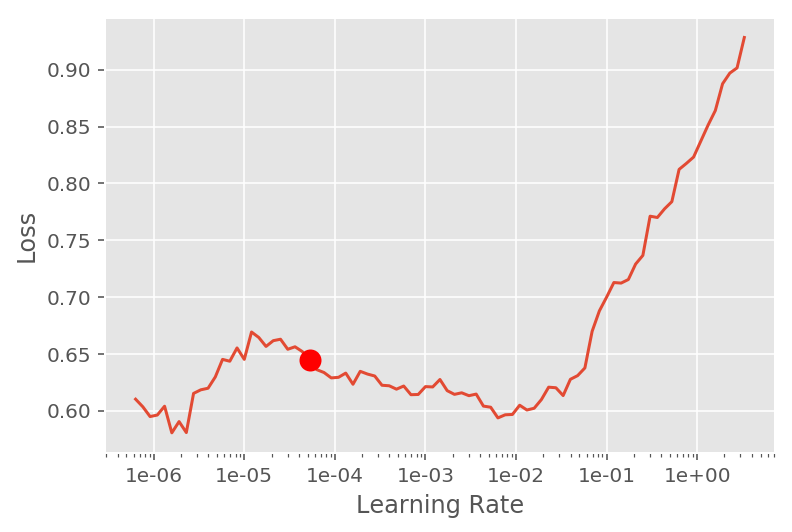

In [75]:
learn.recorder.plot(suggestion=True)

In [77]:
# set new learning rate
lr = learn.recorder.min_grad_lr
lr

5.248074602497728e-05

In [78]:
learn.fit_one_cycle(5, lr, callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                         monitor='kappa_score', name='trial2-rd3')),
                                      EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                            min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.655973,0.557802,0.198087,0.503715,0.552423,0.652709,08:20
1,0.610400,0.544315,0.195355,0.512852,0.561758,0.649646,08:25
2,0.572707,0.533635,0.193989,0.509607,0.563799,0.655377,08:29
3,0.545905,0.522743,0.198087,0.505470,0.566389,0.635589,08:29


Better model found at epoch 0 with kappa_score value: 0.5037152171134949.
Better model found at epoch 1 with kappa_score value: 0.5128518342971802.
Better model found at epoch 4 with kappa_score value: 0.5206193923950195.
Epoch 4: early stopping


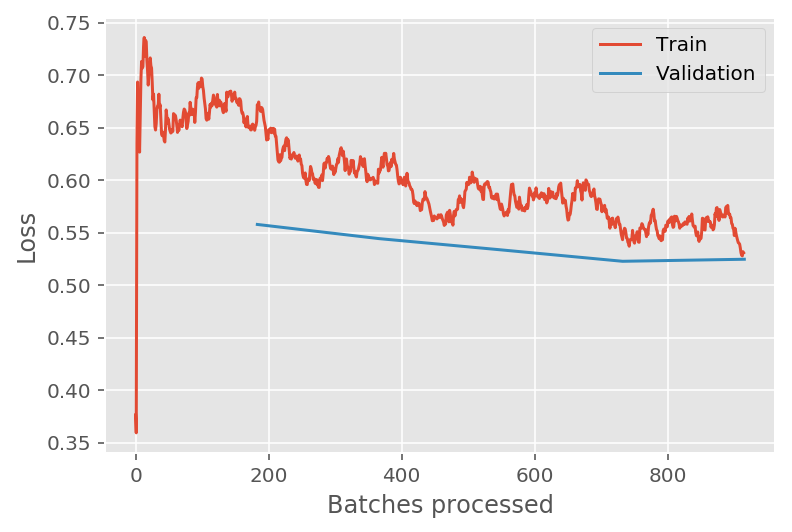

In [79]:
learn.recorder.plot_losses()

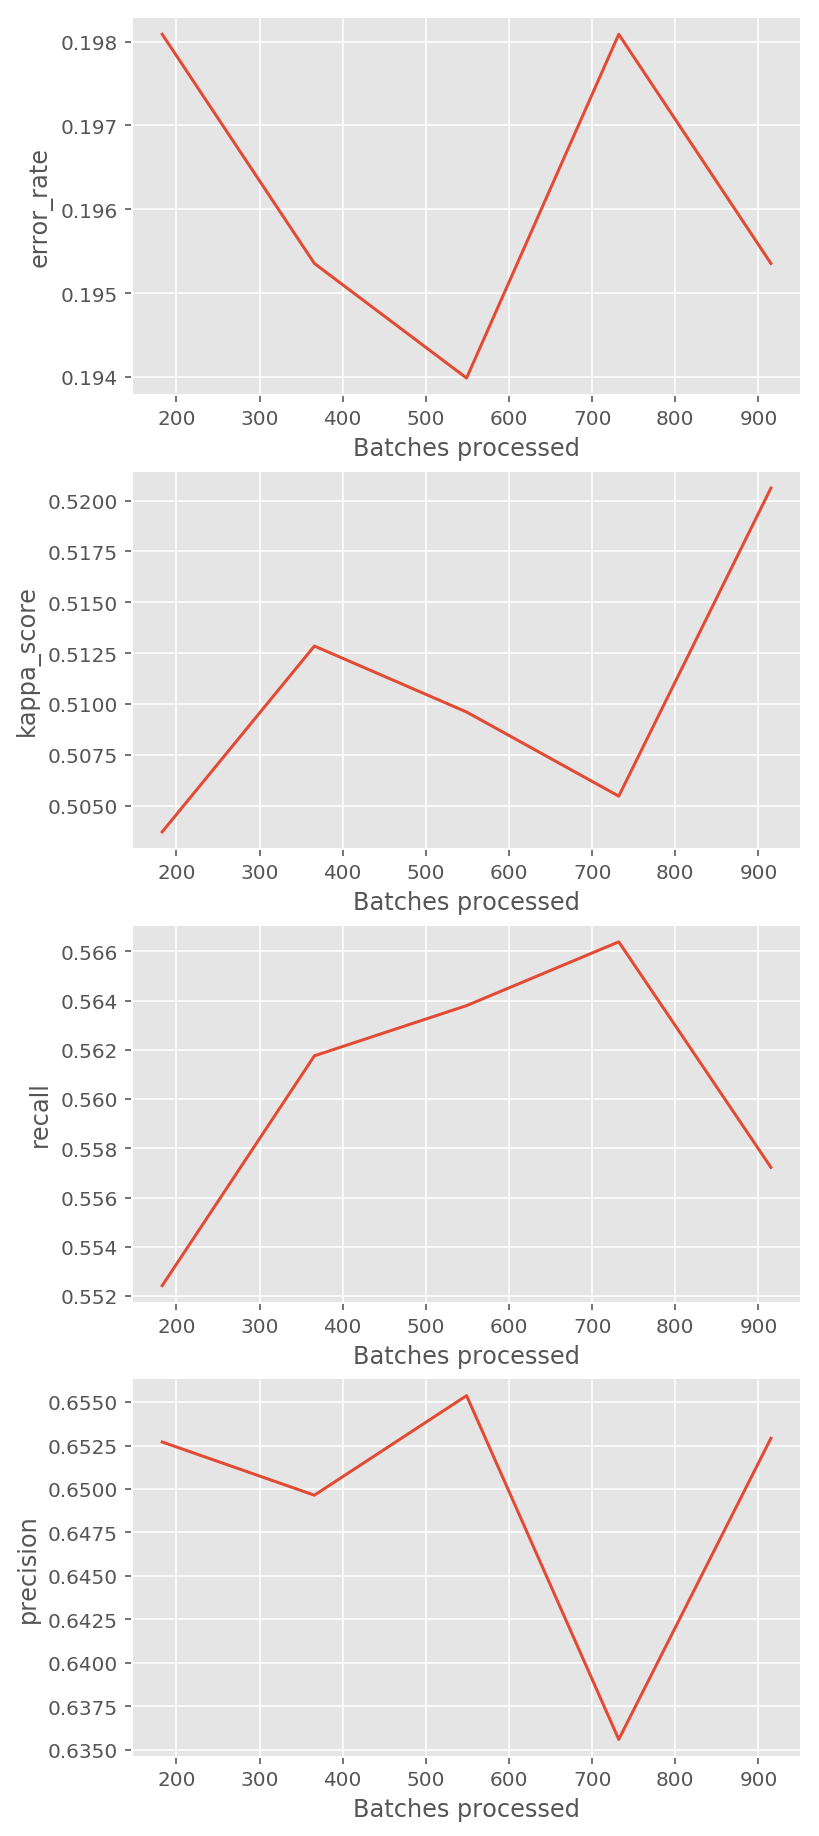

In [80]:
learn.recorder.plot_metrics()

# Unfreeze Lower Layers & Continue Training

In [0]:
# load weights from previous round of training
learn.load(path/'models/models/trial2-rd3');

In [0]:
learn.unfreeze()

In [83]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06
Min loss divided by 10: 1.32E-05


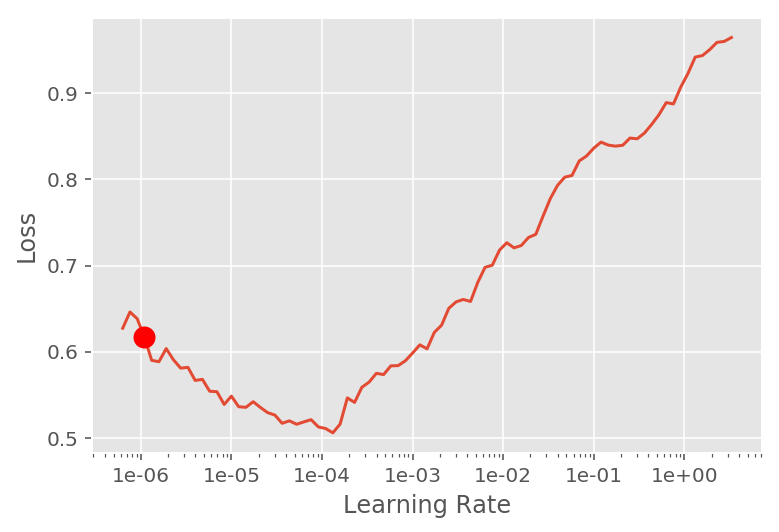

In [84]:
learn.recorder.plot(suggestion=True)

In [86]:
# set new learning rate
lr = learn.recorder.min_grad_lr
lr

1.096478196143185e-06

In [87]:
# train with learning rate annealing
learn.fit_one_cycle(5, slice(lr, lr/10), callbacks=[(SaveModelCallback(learn, every='improvement', 
                                                                       monitor='kappa_score', name='trial2-rd4')),
                                                    EarlyStoppingCallback(learn, monitor='kappa_score', 
                                                                          min_delta=0.05, patience=3)])

epoch,train_loss,valid_loss,error_rate,kappa_score,recall,precision,time
0,0.533648,0.525878,0.195355,0.506320,0.560041,0.645329,08:37
1,0.541100,0.511455,0.187158,0.543249,0.582099,0.659969,08:31
2,0.520010,0.521455,0.191257,0.545844,0.568298,0.645262,08:28
3,0.542310,0.514606,0.196721,0.530741,0.568742,0.635835,08:25


Better model found at epoch 0 with kappa_score value: 0.5063202381134033.
Better model found at epoch 1 with kappa_score value: 0.5432490110397339.
Better model found at epoch 2 with kappa_score value: 0.5458442568778992.
Better model found at epoch 4 with kappa_score value: 0.5479185581207275.
Epoch 4: early stopping


# Interpretation of The Results

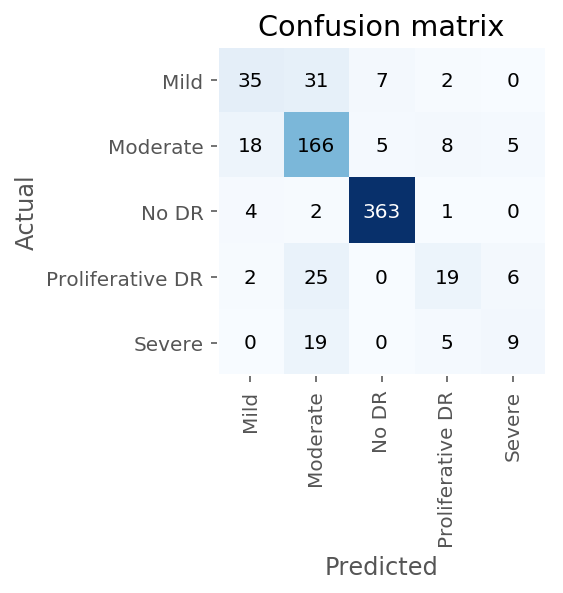

In [90]:
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()